# House Market

Let's go a little further into python.

1. Download the four files “superficie.csv” / “nombre_de_sdb.csv” / “nombre_de_chambres.csv” / "house_price.csv"

2. Read the files and create the 4 corresponding Dataframes


In [1]:
import pandas as pd

In [24]:
df_superficie = pd.read_csv("house_market/superficie.csv", header=None)
df_nb_sdb = pd.read_csv("house_market/nombre_de_sdb.csv", header=None)
df_nb_chambres = pd.read_csv("house_market/nombre_de_chambres.csv", header=None)
df_house_price = pd.read_csv("house_market/house_price.csv")

In [25]:
display(df_superficie)
display(df_nb_sdb)
display(df_nb_chambres)
display(df_house_price)

,0,1
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713
...,...,...
95,95,11417
96,96,12126
97,97,16390
98,98,23738


,0,1
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1
...,...,...
95,95,3
96,96,1
97,97,1
98,98,1


,0,1
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2
...,...,...
95,95,3
96,96,2
97,97,2
98,98,2


,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0
...,...,...,...
95,95,15,157223.0
96,96,81,1616313.0
97,97,42,143573.0
98,98,19,974546.0


3. Give a column name to the three datasets that don't have a header in the source file

In [26]:
df_superficie.columns = ["id", "superficie"]
df_superficie.head()

,id,superficie
0,0,28844
1,1,27667
2,2,14742
3,3,28089
4,4,11713


In [27]:
df_nb_sdb.columns = ["id", "bathrooms"]
df_nb_sdb.head()

,id,bathrooms
0,0,2
1,1,1
2,2,1
3,3,3
4,4,1


In [28]:
df_nb_chambres.columns = ["id", "rooms"]
df_nb_chambres.head()

,id,rooms
0,0,1
1,1,4
2,2,1
3,3,4
4,4,2


In [29]:
df_house_price.head()

,Unnamed: 0,id,house_price
0,0,14,1918154.0
1,1,30,739142.0
2,2,70,1621938.0
3,3,77,1319862.0
4,4,50,146250.0


4. Make an inner join of these four datasets into a single dataframe. 

In [32]:
df = df_superficie.merge(df_nb_sdb, left_on="id", right_on="id", how="inner").merge(df_nb_chambres, left_on="id", right_on="id", how="inner").merge(df_house_price, left_on="id", right_on="id", how="inner")
df

,id,superficie,bathrooms,rooms,Unnamed: 0,house_price
0,0,28844,2,1,32,1421908.0
1,1,27667,1,4,71,1305091.0
2,2,14742,1,1,65,164373.0
3,3,28089,3,4,88,1441714.0
4,4,11713,1,2,49,108290.0
...,...,...,...,...,...,...
95,95,11417,3,3,39,132599.0
96,96,12126,1,2,15,155828.0
97,97,16390,1,2,13,237061.0
98,98,23738,1,2,9,976422.0


5. What is the average surface area of the houses in our dataset?

In [33]:
df["superficie"].mean()

20439.77

6. What is the median and average number of rooms?

In [38]:
avg_rooms = df["rooms"].mean()
median_rooms = df["rooms"].median()
print(f"The average nb of rooms is {avg_rooms}")
print(f"The median nb of rooms is {median_rooms}")

The average nb of rooms is 2.42
The median nb of rooms is 2.0


7. What is the average cost of a house?

In [39]:
df["house_price"].mean()

767747.87

8. What is the average cost of a house, depending on the number of rooms it has?

In [41]:
df.groupby("rooms")["house_price"].mean()

rooms
1    980774.869565
2    642086.258065
3    645904.592593
4    888045.631579
Name: house_price, dtype: float64

10. The average cost per room doesn't tell us much. Let's try to categorize by size.

  - Create a new column in your dataset that we'll call home_size
Create three categories that respectively correspond to :

      - "very large" == "a house larger than 25,000 sqrt_feet"
      
      - "large" == "a house between 20,000 and 25,000 sqrt_feet"
      
      - "medium" == "a house between 15,000 and 20,000 sqrt_feet"
    
      - "small" == "a house between 10,000 and 15,000 sqrt_feet" 
    
      - "very small" == a house less than 10,000 sqrt_feet"
      
Fill in the corresponding rows in the house_size column.

In [46]:
def category(x):
    if x >= 25000:
        return "very large"
    elif 20000 <= x < 25000:
        return "large"
    elif 15000 <= x < 20000:
        return "medium"
    elif 10000 <= x < 15000:
        return "small"
    else :
        return "very small"


df["house_size"] = df["superficie"].apply(lambda x : category(x))
df.head(20)

,id,superficie,bathrooms,rooms,Unnamed: 0,house_price,house_size
0,0,28844,2,1,32,1421908.0,very large
1,1,27667,1,4,71,1305091.0,very large
2,2,14742,1,1,65,164373.0,small
3,3,28089,3,4,88,1441714.0,very large
4,4,11713,1,2,49,108290.0,small
5,5,28591,3,4,33,1703033.0,very large
6,6,17385,3,3,54,340284.0,medium
7,7,26197,2,3,42,1236645.0,very large
8,8,17611,2,3,20,257405.0,medium
9,9,12841,3,3,99,157433.0,small


11. What is the average cost of a house depending on its size category?


In [47]:
df.groupby("house_size")["house_price"].mean()

house_size
large         7.325385e+05
medium        3.256948e+05
small         1.561387e+05
very large    1.552456e+06
Name: house_price, dtype: float64

 12. Apply the code below to view your result. What can you conclude?

c:\Users\Romain\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


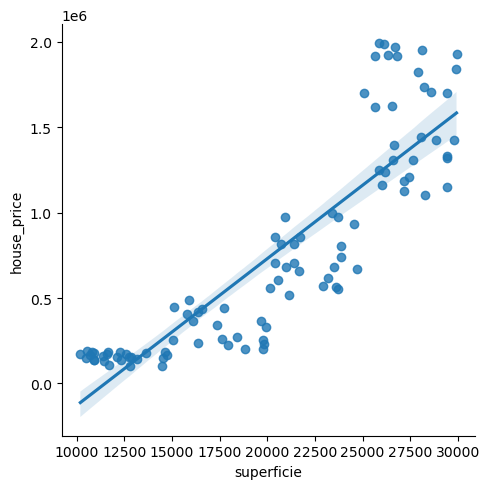

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x = "superficie", y="house_price", data = df)
plt.show()

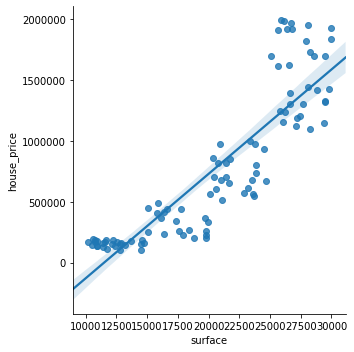

In [36]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x = "surface", y="house_price", data = df)